## Linear Regression - Introduction

### Linear Regression

In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. Let X be the independent variable and Y be the dependent variable. We will define a linear relationship between these two variables as follows:

$y = wX + b$

w is the slope of the line and b is the y intercept. Today we will use this equation to train our model with a given dataset and predict the value of Y for any given value of X. Our task today is to determine the value of w and b, such that the line corresponding to those values is the best fitting line or gives the minimum error.

The vectorized form of above equation is written as $y = Xw$, where y and w are vectors while X is a matrix. 

The b term is included within the X matrix.


**Hypothesis of Linear Regression**

The linear regression model can be represented by the following equation:



#$y= w_1x_1 + w_2x_2 + ......+w_nx_n + b(1)$



The bias term can further be incorporated into the equation as an additional weight with cofficient 1

#$y= w_1x_1 + w_2x_2 + ......+w_nx_n + w_0(1)$

### LR - Procedure

Our Loss function for Linear regression would be sum of squares, which makes the cost function to be:


#$L(y,t)=\frac{1}{2}\ (y-t)^2$

Here t is the actual value and y is the predicted value. 
For the simplest case lets assume a straight line with folowing equation Lets substitute the value of y from $y = wx + b$:

#$J=\frac{1}{2N}[\sum_{i=1}^N((wx^{(i)}+b)-t^{(i)})^2]$

Partial Derivative of the above equation with respect to w is shown here:


#$\frac{{\partial J}}{\partial w}=\frac{1}{2N}[\sum_{i=0}^N2((wx^{(i)}+b
)-t^{(i)})(x^{(i)})]$

#$\frac{{\partial J}}{\partial w}=\frac{1}{N}[\sum_{i=0}^Nx^{(i)}(y^{(i)}-t^{(i)})]$

While the Partial Derivative with respect to b is shown here

#$\frac{\partial J}{\partial b}=\frac{1}{N}[\sum_{i=0}^N(y^{(i)}-t^{(i)})]$

The solution for the general case comes out to be:

#$w = (X^TX)^{-1}X^Tt$

With $L_2$ Regularization. Cost:

#$J(w) = \frac{1}{2N}[\sum_{i=1}^N(h_w (x^{(i)}) - t^{(i)})^2 + \lambda\sum_{j=1}^nw^2_j]$ 

#$w = (X^TX + \lambda I)^{-1}X^Tt$

#### Gradient Descent Solution

Gradient descent uses the equations for gradient derived above to find the direction. 

# $w_j=w_j-\alpha*\frac{{\partial J}}{\partial w}$

# $b_j=b_j-\alpha*\frac{{\partial J}}{\partial b}$

$\alpha$ is defined as the learning rate.

### Import library

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [0]:
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

### Data overview

The Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. Three additional feature were added to this dataset using feature engineering.The objective is to predict the value of prices of the house using the given features.


In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/Saket-Uoft/Data/master/data.csv")

In [0]:
df = df.drop('Unnamed: 0', axis=1)

In [0]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,New,New1,New2,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,20.31,0.0,13231.610,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,7.07,0.0,12038.120,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,7.07,0.0,7797.856,34.7


In [0]:
df.shape

(506, 17)

We can see that the target value is given by name by the name MEDV 

In [0]:
# detect any null data point
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
New        0
New1       0
New2       0
MEDV       0
dtype: int64

#### Exploratory Data Analysis

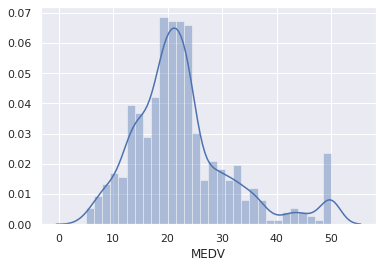

In [0]:
sns.set(rc={'figure.figsize':(6, 4)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

We can see that it mostly normally distributed with a few outliers.

## Linear Regression

## Data Prepration

- Split the multivariate data into training/validation data = 2:8

- Normalize the data using StandardScaler from sklearn.

In [0]:
y = df['MEDV']
X = df.drop(['MEDV'], axis=1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [0]:
X_train.shape

(404, 16)

In [0]:
X_test.shape

(102, 16)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [0]:
X_train_std_new = np.vstack((np.ones(X_train_std.shape[0]), X_train_std.T)).T

In [0]:
X_train_std_new[0]

array([ 1.        , -0.39262879, -0.48699244, -0.58398492, -0.26226526,
       -0.90095561, -1.28065634,  0.97094624,  0.9700838 , -0.73532048,
       -1.03120804, -0.23241985,  0.43823462,  2.60935849, -0.74468441,
       -0.26011017, -0.38675531])

In [0]:
X_test_std_new = np.vstack((np.ones(X_test_std.shape[0]), X_test_std.T)).T

In [0]:
X_test_std_new[0]

array([ 1.        ,  1.97220887, -0.48699244,  1.0378004 , -0.26226526,
        1.03192701,  1.45664211,  1.06287884, -1.19551272,  1.69777584,
        1.55883453,  0.82415806,  0.43823462,  0.14608061, -0.21291871,
       -0.26011017,  1.58745408])

In [0]:
X_train_std_new.shape

(404, 17)

In [0]:
y_train_new = np.array(y_train).reshape(-1, 1)
y_test_new = np.array(y_test).reshape(-1,1)

## Direct Solution

Impelement the direct solution for linear regression on the dataset above and find best lambda.

- Plot Train error and Validation error as a function of the lambda regularizer.

- Find the best lambda where the best fit occurs. This best lambda can be used from here on out.

In [0]:
# define a function to find the direct solution in vector form
# inputs are training data, testing data and lambda options
# outputs are weights, training error and testing error for each model with different lambda
def DirectSolution(lambda_options, xtraining, xtesting, ytraining, ytesting):
  # create empty lists and number of features in training data
  TrainError = []
  ValidationError = []
  Weights = []
  N, num = xtraining.shape
  for lambd in lambda_options:
    # direct weights
    w = np.dot(np.linalg.inv(np.dot(xtraining.T, xtraining) + (lambd)*np.identity(num)), np.dot(xtraining.T, ytraining))
    Weights.append(w)
    # calculate training error and testing error
    TrainError.append(rmse(np.dot(xtraining, w), ytraining))
    ValidationError.append(rmse(np.dot(xtesting, w), ytesting))
  return Weights, TrainError, ValidationError

In [0]:
regulizer = np.arange(0,50,0.5)
W, train_error, val_error = DirectSolution(regulizer, X_train_std_new, X_test_std_new, y_train_new, y_test_new)

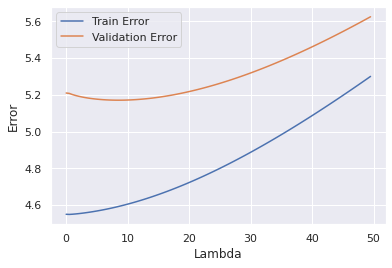

In [0]:
plt.figure(figsize=(6,4))
plt.plot(regulizer, train_error, label='Train Error')
plt.plot(regulizer, val_error, label='Validation Error')
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.legend()
plt.show()

In [0]:
# because validation error here is a convex plot
# can find out the smallest validation error and the corresponding lambda
best_lambda = regulizer[np.argmin(val_error)]
best_lambda

8.5

In [0]:
# find the weights based on the model with the best lambda
best_weights = W[np.argmin(val_error)]
best_weights

array([[22.28581818],
       [-0.62398402],
       [ 0.55653824],
       [-0.52125658],
       [ 0.42940281],
       [-1.54886058],
       [ 2.44616681],
       [-0.10058535],
       [-3.00185844],
       [ 2.29529114],
       [-2.1283074 ],
       [-2.06684727],
       [ 0.89402184],
       [-3.87822809],
       [ 0.46128878],
       [ 0.30496876],
       [ 0.49776661]])

Text(0, 0.5, 'Values')

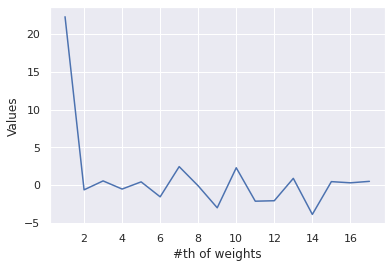

In [0]:
# show the weights in the plot
plt.figure(figsize=(6, 4))
plt.plot(np.arange(1, len(best_weights)+1), best_weights, label='Direct Solution')
plt.xlabel('#th of weights')
plt.ylabel('Values')

I will use 8.5 because it gets the smallest test error and an acceptable train error.

## Gradient Descent

- Implement batch gradient descent for linear regression using a fixed learning rate $\alpha$ of 1e-2.

- Run the gradient descent for a fixed number of epochs based on convergence.

In [0]:
# define a function to do gradient descent with regulizer
# inputs are lambda, alpha, training data, testing data, iterations
# outputs are training error, testing error
# number of epochs depends on the converge
# in short, which iteration errors are nearly not change
def GradientDescent(iterations, lambd, alpha, xtraining, xtesting, ytraining, ytesting):
  TrainError = []
  ValidationError = []
  cost = []
  N, num = xtraining.shape
  # all the weights are zero (float) at the start
  w_init = np.array([0.0]*num).reshape(-1,1)
  for iteration in range(iterations):
    yTrainPred = np.dot(xtraining, w_init)
    yTestPred = np.dot(xtesting, w_init)
    c = (np.sum((yTrainPred-ytraining)**2) + lambd*np.sum(w_init**2))/(2*N)
    TrainError.append(rmse(yTrainPred, ytraining))
    ValidationError.append(rmse(yTestPred, ytesting))
    cost.append(c)
    # update the weights
    gradient = np.dot(xtraining.T, (yTrainPred-ytraining)) + lambd*w_init
    w_init -= (alpha/N)*gradient
  return w_init, TrainError, ValidationError, cost

In [0]:
iterations = 3000
alp = 0.01
W_GD, TrainError_GD, ValError_GD, cost = GradientDescent(iterations, best_lambda, alp, X_train_std_new, X_test_std_new, y_train_new, y_test_new)

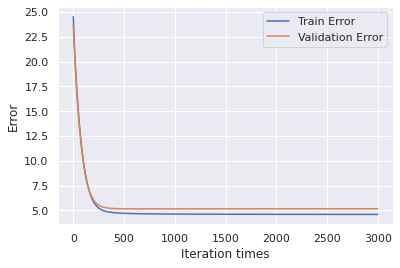

In [0]:
plt.figure(figsize=(6,4))
plt.plot(TrainError_GD, label='Train Error')
plt.plot(ValError_GD, label='Validation Error')
plt.xlabel('Iteration times')
plt.ylabel('Error')
plt.legend()
plt.show()

Text(0, 0.5, 'Cost value')

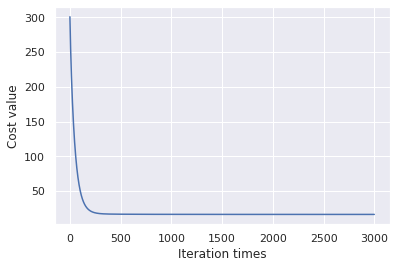

In [0]:
# plot the cost
plt.figure(figsize=(6,4))
plt.plot(cost, label='Cost function')
plt.xlabel('Iteration times')
plt.ylabel('Cost value')

Text(0, 0.5, 'Values')

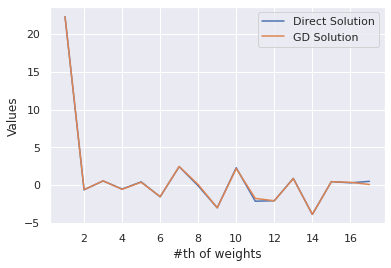

In [0]:
plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(best_weights)+1), best_weights, label='Direct Solution')
plt.plot(np.arange(1, len(W_GD)+1), W_GD, label='GD Solution')
plt.legend()
plt.xlabel('#th of weights')
plt.ylabel('Values')

In [0]:
err = (best_weights - W_GD)/best_weights
err = np.mean(err)
print(round(err,2))

0.16


We can see the gradient descent process converge at nearly 500 iterations and then slowly deceases the cost. Within 3000 iterations, the weights error can be controlled in 16%. With more iterations, the weights error will be much more less.

## Mini-batch size and learning rate

- Impelement Mini-batch Gradient Descent.

- Sweep different values for the batch size with a fixed learning rate.

- Select the best batch size base on fastest convergence (number of times you update the weights) and then find the proper learning rate.


In [0]:
import time

In [0]:
# define a function to do mini-batch GD
# inputs are training data, testing data, learning rate, batch size, epoch
# outputs are training error, validation error, weights, updates
def MiniGD(batch_size, alpha, xtraining, xtesting, ytraining, ytesting, epoch):
  TrainErrorUpdates = []
  TrainErrorIterations = []
  TestErrorUpdates = []
  Timestamps = []
  N, num = xtraining.shape
  M = xtesting.shape[0]
  # all the weights are zero (float) at the start
  w = np.array([0.0]*num).reshape(-1,1)
  for _ in range(epoch):
    start = time.time()
    # shuffle training data each epoch to reduce bias
    # very important here, otherwise will slow converge time
    shuffle_idx = np.random.permutation(N)
    xtraining = xtraining[shuffle_idx, :]
    ytraining = ytraining[shuffle_idx]
    for s in range(0, N, batch_size):
      # mini batch
      miniX = xtraining[s:s+batch_size]
      miniY = ytraining[s:s+batch_size]
      yTrainPred = np.dot(miniX, w)
      # update the weights
      gradient = np.dot(miniX.T, yTrainPred - miniY)
      w -= (alpha/batch_size)*gradient
      # rmse for the whole dataset now after updates
      TrainErrorUpdates.append((np.sum((np.dot(xtraining, w) - ytraining)**2)/N)**0.5)
      TestErrorUpdates.append((np.sum((np.dot(xtesting, w) - ytesting)**2)/M)**0.5)
    # times used each update
    Timestamps.append(time.time()-start)
    # rmse for the whole dataset now after each iteration
    TrainErrorIterations.append((np.sum((np.dot(xtraining, w) - ytraining)**2)/N)**0.5)
  return TrainErrorUpdates, TrainErrorIterations, TestErrorUpdates, w, Timestamps

In [0]:
# set some numbers as batch sizes
batch_sizes = [1, 16, 64, 128]
# fixed learning rate first
alpha = 0.01
TrainErrorU_total = []
TrainErrorI_total = []
TestErrorU_total = []
W_MGD_total = []
Times_total = []
for size in batch_sizes:
  print('Now processing batch size =', size)
  TrainErrorU_MGD, TrainErrorI_MGD, TestErrorU_MGD, W_MGD, Times = MiniGD(size, alpha, X_train_std_new, X_test_std_new, \
                                                                          y_train_new, y_test_new, 50)
  TrainErrorU_total.append(TrainErrorU_MGD)
  TrainErrorI_total.append(TrainErrorI_MGD)
  TestErrorU_total.append(TestErrorU_MGD)
  W_MGD_total.append(W_MGD)
  Times_total.append(Times)

Now processing batch size = 1
Now processing batch size = 16
Now processing batch size = 64
Now processing batch size = 128


Text(0, 0.5, 'Error')

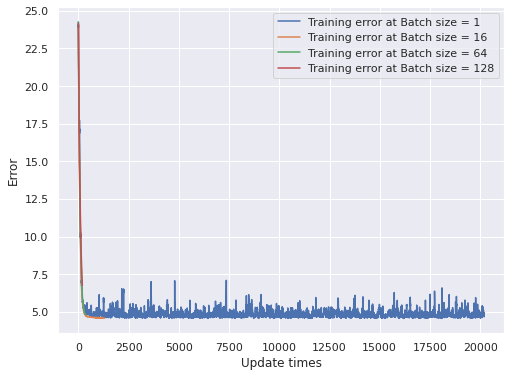

In [0]:
# plot the training error
plt.figure(figsize=(8, 6))
for idx in range(len(batch_sizes)):
  plt.plot(TrainErrorU_total[idx], label = 'Training error at Batch size = {}'.format(batch_sizes[idx]))
  plt.legend()
plt.xlabel('Update times')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

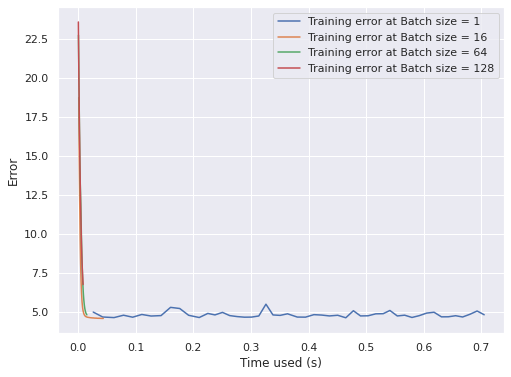

In [0]:
# plot training error vs. time taken
plt.figure(figsize=(8, 6))
for idx in range(len(batch_sizes)):
  # accumulate all the time intervals to be the timestamps
  timestamps = np.array(Times_total[idx]).cumsum()
  plt.plot(timestamps, TrainErrorI_total[idx], label = 'Training error at Batch size = {}'.format(batch_sizes[idx]))
  plt.legend()
plt.xlabel('Time used (s)')
plt.ylabel('Error')

Here we can see within fixed 50 epoches, batch size = 1 and 16 both converge in the given times, but batch size = 1 take longer and is not very stable. Based on fastest convergence, I will use batch size = 16. (I also tried regulizer, but not very good performance, it gets larger error and noisy oscillation.)

In [0]:
# set some numbers as learning rate
lr = [0.005, 0.01, 0.025, 0.05, 0.1]
# fixed batch size
batch_size = 16
TrainErrorU_total = []
TrainErrorI_total = []
TestErrorU_total = []
W_MGD_total = []
Times_total = []
for alpha in lr:
  print('Now processing learnig rate =', alpha)
  TrainErrorU_MGD, TrainErrorI_MGD, TestErrorU_MGD, W_MGD, Times = MiniGD(batch_size, alpha, X_train_std_new, X_test_std_new, y_train_new, y_test_new, 50)
  TrainErrorU_total.append(TrainErrorU_MGD)
  TrainErrorI_total.append(TrainErrorI_MGD)
  TestErrorU_total.append(TestErrorU_MGD)
  W_MGD_total.append(W_MGD)
  Times_total.append(Times)

Now processing learnig rate = 0.005
Now processing learnig rate = 0.01
Now processing learnig rate = 0.025
Now processing learnig rate = 0.05
Now processing learnig rate = 0.1


Text(0, 0.5, 'Error')

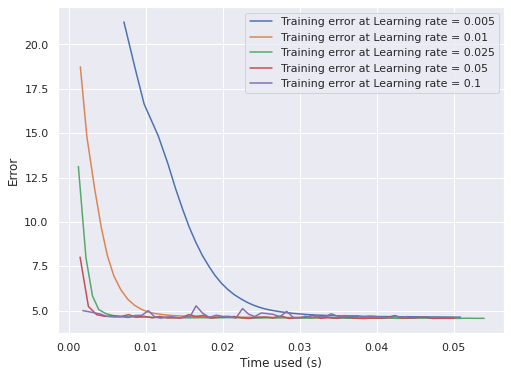

In [0]:
# plot training error vs. time taken
plt.figure(figsize=(8, 6))
for idx in range(len(lr)):
  # accumulate all the time intervals to be the timestamps
  timestamps = np.array(Times_total[idx]).cumsum()
  plt.plot(timestamps, TrainErrorI_total[idx], label = 'Training error at Learning rate = {}'.format(lr[idx]))
  plt.legend()
plt.xlabel('Time used (s)')
plt.ylabel('Error')

Text(0, 0.5, 'Values')

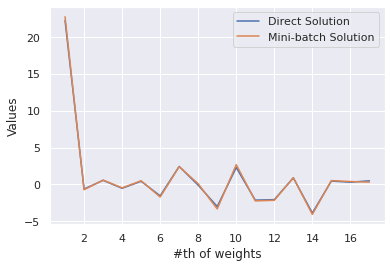

In [0]:
plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(best_weights)+1), best_weights, label='Direct Solution')
plt.plot(np.arange(1, len(W_MGD_total[2])+1), W_MGD_total[2], label='Mini-batch Solution')
plt.legend()
plt.xlabel('#th of weights')
plt.ylabel('Values')

In [0]:
err = (W_MGD_total[2] - W_GD)/best_weights
err = np.mean(err)
print(round(err,2))

0.1


I will choose learning rate to be 0.025 because it converges faster than 0.01 and 0.005. Learning rate = 0.1 and 0.05 seem to decrease the training error faster than 0.025 but they decrease error in a very large step that would cause instability when converge, which is not good. With batch size = 16 and learning rate = 0.025 and epoch = 50, the weights error can be controlled within 10% compared to the direct solution.

## Adaptive Learning rate

Impelement an adaptive learning rate scheme where starting a mini-batch gradient descent with a large learning rate and decrease the learning rate while getting closer to the local minima. 

One method is Time-based adaptive learning rate, the learning rate will change according to a decay factor each epoch. The decay factor is a hyperparameter. Always equal to raw learning rate/100.

Reference: https://machinelearningmastery.com/using-learning-rate-schedules-deep-learning-models-python-keras/

https://cs231n.github.io/neural-networks-3/

In [0]:
# define a function to do mini-batch with changing learning rate
def TB_MiniGD(batch_size, alpha, xtraining, xtesting, ytraining, ytesting, epoch, decay):
  TrainErrorUpdates = []
  TrainErrorIterations = []
  Timestamps = []
  N, num = xtraining.shape
  # all the weights are zero (float) at the start
  # w = np.array([0.0]*num).reshape(-1,1)
  w = np.random.randn(num, 1)
  for _ in range(epoch):
    start = time.time()
    # shuffle training data each epoch to reduce bias
    # very important here, otherwise will slow converge time
    shuffle_idx = np.random.permutation(N)
    xtraining = xtraining[shuffle_idx, :]
    ytraining = ytraining[shuffle_idx]
    itera = 0
    for s in range(0, N, batch_size):
      itera += 1
      # mini batch
      miniX = xtraining[s:s+batch_size]
      miniY = ytraining[s:s+batch_size]
      yTrainPred = np.dot(miniX, w)
      # update the weights
      gradient = np.dot(miniX.T, yTrainPred - miniY)
      w -= (alpha/batch_size)*gradient
      alpha *= 1/(1 + decay*itera)
      # rmse for the whole dataset now after updates
      TrainErrorUpdates.append((np.sum((np.dot(xtraining, w) - ytraining)**2)/N)**0.5)
    # update the learning rate
    # times used each update
    Timestamps.append(time.time()-start)
    # rmse for the whole dataset now after each iteration
    TrainErrorIterations.append((np.sum((np.dot(xtraining, w) - ytraining)**2)/N)**0.5)
  return TrainErrorUpdates, TrainErrorIterations, w, Timestamps

In [0]:
alpha = 0.2
TrainErrorU_TB, TrainErrorI_TB, W_TB, Times_TB = TB_MiniGD(16, alpha, X_train_std_new, X_test_std_new, y_train_new, y_test_new, 50, 0.002)

Text(0, 0.5, 'Training Error')

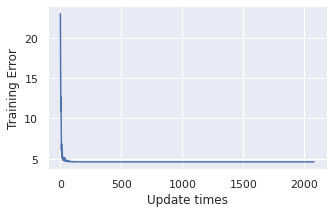

In [0]:
# plot the training error
plt.figure(figsize=(5, 3))
plt.plot(TrainErrorU_TB)
plt.xlabel('Update times')
plt.ylabel('Training Error')

Text(0, 0.5, 'Training Error')

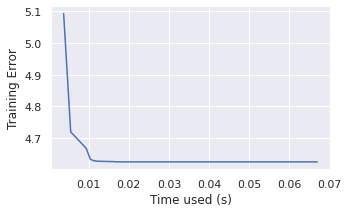

In [0]:
# plot training error vs. time taken
plt.figure(figsize=(5, 3))
timestamps = np.array(Times_TB).cumsum()
plt.plot(timestamps, TrainErrorI_TB)
plt.xlabel('Time used (s)')
plt.ylabel('Training Error')

## Combined methods - Fastest Solution!

In this part, find a mini-batch size and a learning rate adjustment scheme to train the model quickly. The converge rule is when training the model until the loss of the model on the test set is close to direct solution with $\pm 1\%$ error.

In [0]:
# as we know the direct solution with the best lambda before
# we calculate the test loss
loss_direct = 0.5*np.sum((np.dot(X_test_std_new, best_weights)-y_test_new)**2)

In [0]:
# modify the function to start with random coefficients, not zero from the start
# also stop updating the weights until it reaches the loss error = +-1% 
def TBD_MiniGD(batch_size, alpha, xtraining, xtesting, ytraining, ytesting, epoch, decay):
  TestLossUpdates = []
  Timestamps = []
  N, num = xtraining.shape
  w = np.random.randn(num, 1)
  for _ in range(epoch):
    start = time.time()
    shuffle_idx = np.random.permutation(N)
    xtraining = xtraining[shuffle_idx, :]
    ytraining = ytraining[shuffle_idx]
    itera = 0
    for s in range(0, N, batch_size):
      itera += 1
      miniX = xtraining[s:s+batch_size]
      miniY = ytraining[s:s+batch_size]
      yTrainPred = np.dot(miniX, w)
      gradient = np.dot(miniX.T, yTrainPred - miniY)
      w -= (alpha/batch_size)*gradient
      alpha *= 1/(1 + decay*itera)
      TestLossUpdates.append(0.5*np.sum((np.dot(xtesting, w) - ytesting)**2))
      TestLossError = (TestLossUpdates[-1]-loss_direct)/loss_direct
      if TestLossError < 0.01 and TestLossError > -0.01:
        break
    Timestamps.append(time.time()-start)
  return w, TestLossError, Timestamps

In [0]:
# there are 4 options
batches = [16, 16, 32, 32]
alphas = [0.2, 0.1, 0.2, 0.1]
decays = [0.002, 0.001, 0.002, 0.001]
AvgTestLossError = []
AvgTimeTaken = []
Weights = []
for opt in range(4):
  TestLossError_ten = []
  TimeTaken_ten = []
  Weights_ten = []
  for _ in range(10):
    w, TLE, Time = TBD_MiniGD(batches[opt], alphas[opt], X_train_std_new, X_test_std_new, y_train_new, y_test_new, 50, decays[opt])
    TestLossError_ten.append(TLE)
    TimeTaken_ten.append(np.sum(Time))
    Weights_ten.append(w)
  AvgTestLossError.append(np.mean(TestLossError_ten))
  AvgTimeTaken.append(np.mean(TimeTaken_ten))
  Weights.append(np.mean(Weights_ten, axis=0))

In [0]:
stats = {'Batch size': batches, 'Learning rate': alphas, 'Decay': decays, \
         'Avg test loss error (%)': pd.Series(AvgTestLossError)*100, 'Avg time taken': AvgTimeTaken}

In [0]:
pd.DataFrame(stats)

,Batch size,Learning rate,Decay,Avg test loss error (%),Avg time taken
0,16,0.2,0.002,0.416371,0.008385
1,16,0.1,0.001,0.246758,0.008140
2,32,0.2,0.002,0.249841,0.006148
3,32,0.1,0.001,0.277861,0.005273


We can see the best loss accuracy is 99.8% and best time is 0.005s with batch size = 32 and raw learning rate = 0.01.